<a href="https://colab.research.google.com/github/AamirKhaan/Student-Academic-Performance/blob/master/14_ArtificialNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="background-color:Aqua; padding:20px; border-radius:10px">Artificial Neural Network (ANN)</h1>

## Overview      

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
    <p>In this section following steps are performed: </p>
    <ol>
        <li>Data Preparation and Encoding</li>
        <li>Preliminary MLP Classifier</li>
        <li>MLP Classifier Optimization with Number of Epochs </li>
        <li>MLP Classifier with optimized Number of Epochs </li>
        <li>Repeated Stratified k-Fold Cross Validation</li>
        <li>Model Learning Curve</li>
    </ol>
</div>


### Standard Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [3]:
# Jupyter Noteboook Configurations (personal prefrences)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set() 

In [4]:
# Global parameters for figure
plt.rcParams["figure.figsize"] = [10.00, 8.00]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.autolayout"] = True

### 1. Data Preparation and Encoding

#### 1.1 Import Modified Data

In [5]:
# Import the Student's data from local storage
# ! Dont' run the cell in colab
data_df = pd.read_csv('./data/xAPI-Edu-Data_modified.csv')

In [ ]:
# Import the Student's data from github storage
# Run only in colab
url = 'https://raw.githubusercontent.com/AamirKhaan/Student-Academic-Performance/main/data/xAPI-Edu-Data_modified.csv'
data_df = pd.read_csv(url)

In [6]:
# Selected Features
CATEGORICAL_FEATURES = ['stage_id','relation', 'parent_answering_survey', 
                            'parent_school_satisfaction','student_absence_days']
NUMERICAL_FEATURES = ['raised_hands', 'visited_resources', 'announcements_view', 'discussion']
TARGET = ['class']

In [7]:
# Optimize Data Type for efficent memory utilization
for feature in CATEGORICAL_FEATURES:
    data_df[feature] = data_df[feature].astype('category')
    
for feature in NUMERICAL_FEATURES:
    data_df[feature] = data_df[feature].astype('int8')

data_df[TARGET] = data_df[TARGET].astype('category')

#### 1.2 Encode Data

In [8]:
# Input Features Encoding
categorical_encoder = OrdinalEncoder(dtype='int8')
categorical_ds  = categorical_encoder.fit_transform(data_df[CATEGORICAL_FEATURES])
categorical_encoded = pd.DataFrame(categorical_ds, columns=CATEGORICAL_FEATURES, dtype='int8')
# Target Encoding
target_encoder = LabelEncoder()
target_ds = target_encoder.fit_transform(data_df[TARGET])
target_encoded = pd.DataFrame(target_ds, columns=TARGET, dtype='int8')
# Combine the Data
encoded_df = pd.concat([categorical_encoded,data_df[NUMERICAL_FEATURES]], axis=1)

### 2.  Preliminary MLP Classifier

In [9]:
X = encoded_df
y = target_encoded

In [10]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# Standard Scaler Transform
transformer = StandardScaler()
transformer.fit(X_train)

X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [12]:
# MLP Classifier
mlp = MLPClassifier(random_state=42, learning_rate_init= 0.0001)

#### 2.1 Model Parameters

In [13]:
# Model parameters
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.0001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [14]:
# Train the model
mlp = mlp.fit(X_train, y_train)

#### 2.2 Model Scores

In [15]:
# Test Accuracy
y_hat = mlp.predict(X_test)
initial_test_accuracy = accuracy_score(y_test, y_hat)
print(f'Preliminary MLP Classifier Test Accuracy: {initial_test_accuracy*100}')
# Train Accuracy
predictions_train = mlp.predict(X_train)
initial_train_accuracy = accuracy_score(y_train, predictions_train)
print(f'Preliminary MLP Classifier Train Accuracy: {initial_train_accuracy*100}')

Preliminary MLP Classifier Test Accuracy: 74.0506329113924
Preliminary MLP Classifier Train Accuracy: 73.75


<div style="background-color:Gainsboro; padding:20px; text-align:justify; ">
<p>The accuracy of the model on Training Data (73.75%) and the accuracy on Test Data (74.05%).</p>
</div>

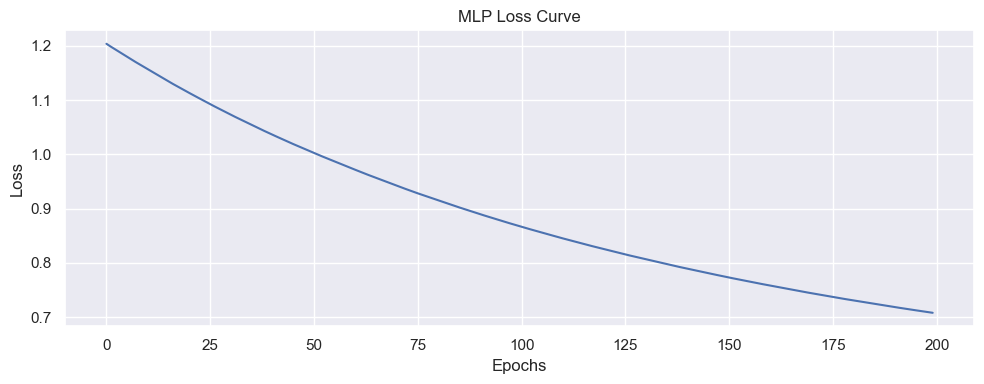

In [16]:
# Loss Curve
fig = plt.figure(figsize=(10,4))
plt.plot(mlp.loss_curve_)
plt.title('MLP Loss Curve')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

#### 2.3 Confusion Matrix

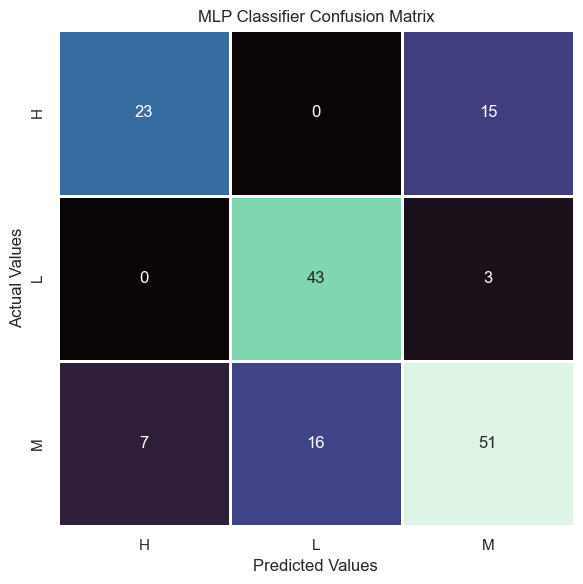

In [17]:
cm_df = pd.DataFrame(confusion_matrix(y_test, y_hat),
                     index = ['H','L','M'], 
                     columns = ['H','L','M'])

fig = plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True, cmap='mako',cbar=False,linewidth=1)
plt.title('MLP Classifier Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#### 2.4 Classification Report

In [18]:
print('MLP Classifier Report\n')
print(classification_report(y_test,y_hat, target_names=['H','L','M']))

MLP Classifier Report

              precision    recall  f1-score   support

           H       0.77      0.61      0.68        38
           L       0.73      0.93      0.82        46
           M       0.74      0.69      0.71        74

    accuracy                           0.74       158
   macro avg       0.74      0.74      0.74       158
weighted avg       0.74      0.74      0.74       158



### 3. MLP Classifier Optimization with Number of Epochs

In [19]:
epochs = np.arange(50,1050,50)
clf_mlp = []
for n in epochs:
    mlp = MLPClassifier(max_iter= n ,random_state=42, learning_rate_init= 0.0001)
    mlp.fit(X_train, y_train)
    clf_mlp.append(mlp)

train_scores = [clf.score(X_train,y_train) for clf in clf_mlp]
test_scores = [clf.score(X_test,y_test) for clf in clf_mlp]

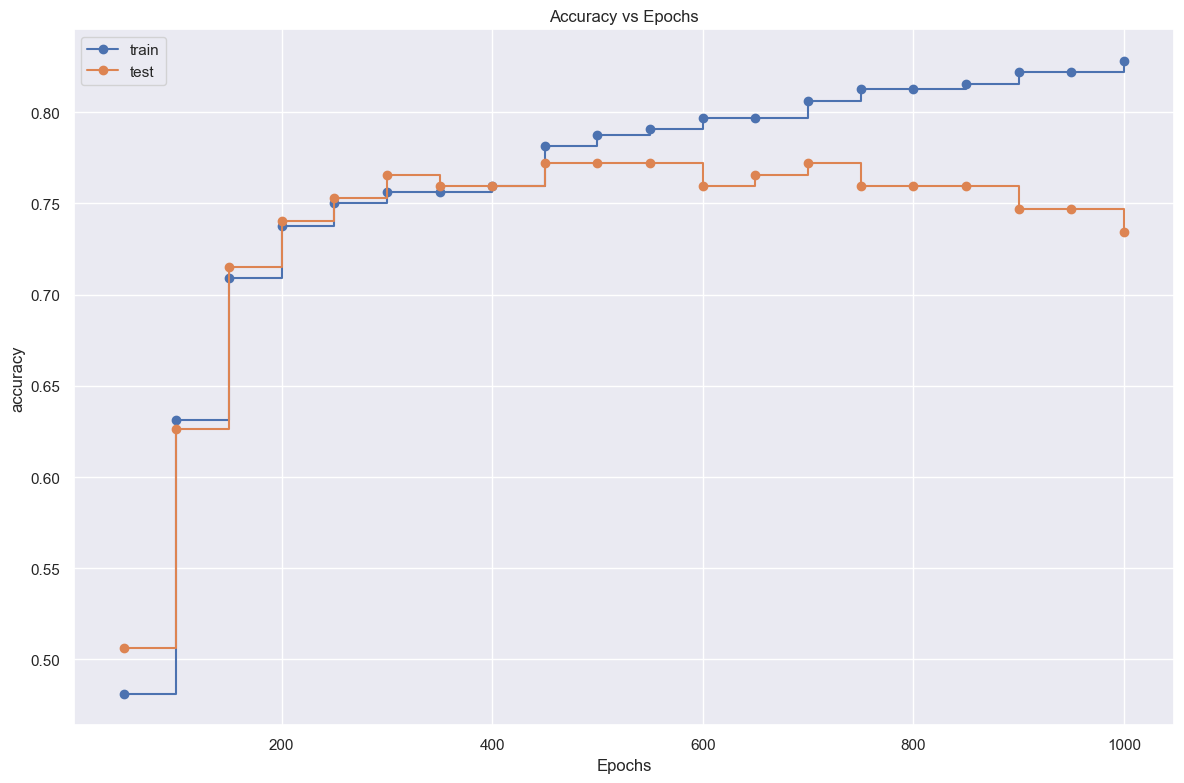

In [20]:
plt.rcParams["figure.figsize"] = [12.00, 8.00]
fig, ax = plt.subplots()
ax.set_xlabel('Epochs')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs Epochs')
ax.plot(epochs , train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(epochs , test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

<div style="background-color:Gainsboro; padding:20px; text-align:justify;">
<p>The graph of accuracy vs Epochs show the variation in the accuracy with respect to Epochs in Training and Test data. The highest accuracy in test data is when the number of Epochs are 450.</p>
</div>

In [21]:
# Get the index of the peak accuracy on the test data
index_max = test_scores.index(max(test_scores))

### 4. MLP Classifier with optimized Number of Epochs

#### 4.1 Optimized MLP Classifier Parameters

In [22]:
clf_mlp[index_max].get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.0001,
 'max_fun': 15000,
 'max_iter': 450,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

#### 4.2 Optimized MLP Classifier Scores

In [23]:
# Test Accuracy
opt_y_test = clf_mlp[index_max].predict(X_test)
opt_test_accuracy = accuracy_score(y_test, opt_y_test)
print(f'Optimized MLP Test Accuracy: {opt_test_accuracy*100}')
# Train Accuracy
opt_y_train = clf_mlp[index_max].predict(X_train)
opt_train_accuracy = accuracy_score(y_train, opt_y_train)
print(f'Optimized MLP Train Accuracy: {opt_train_accuracy*100}')

Optimized MLP Test Accuracy: 77.21518987341773
Optimized MLP Train Accuracy: 78.125


<div style="background-color:Gainsboro; padding:20px; text-align:justify; ">
<p>The accuracy of the optimized model on Training Data (78.125%) is close to the accuracy on Test Data (77.215%). The model shows acceptable performance. </p>
</div>

#### 4.3 Optimized MLP Classifier Confusion Matrix

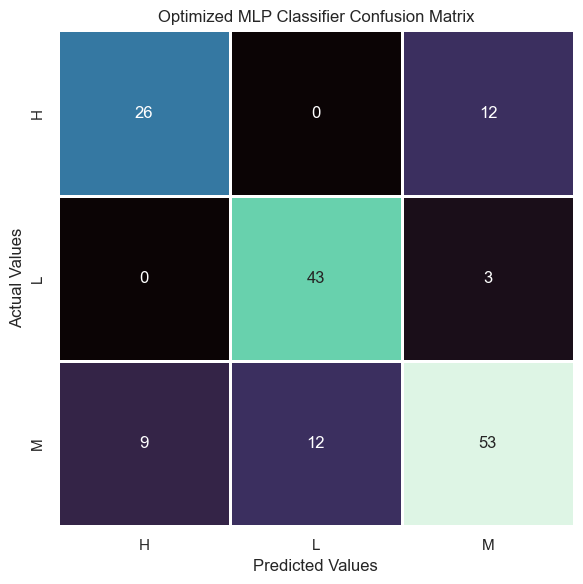

In [24]:
ocm_df = pd.DataFrame(confusion_matrix(y_test, opt_y_test),
                     index = ['H','L','M'], 
                     columns = ['H','L','M'])

fig = plt.figure(figsize=(6,6))
sns.heatmap(ocm_df, annot=True, cmap='mako',cbar=False,linewidth=1)
plt.title('Optimized MLP Classifier Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#### 4.4 Optimized MLP Classification report

In [25]:
print('Optimized MLP Classifier Report\n')
print(classification_report(y_test,opt_y_test, target_names=['H','L','M']))

Optimized MLP Classifier Report

              precision    recall  f1-score   support

           H       0.74      0.68      0.71        38
           L       0.78      0.93      0.85        46
           M       0.78      0.72      0.75        74

    accuracy                           0.77       158
   macro avg       0.77      0.78      0.77       158
weighted avg       0.77      0.77      0.77       158



### 5. Repeated Stratified k-Fold Cross Validation

In [26]:
# Model
clf_cv = mlp = MLPClassifier(max_iter= 450 ,random_state=42, learning_rate_init= 0.0001)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(clf_cv, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)

# Performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.722 (0.078)


### 6. Model Learning Curve

In [27]:
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
estimator = mlp = MLPClassifier(max_iter= 450 ,random_state=42, learning_rate_init= 0.0001)

train_sizes=np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        return_times=True,
    )

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

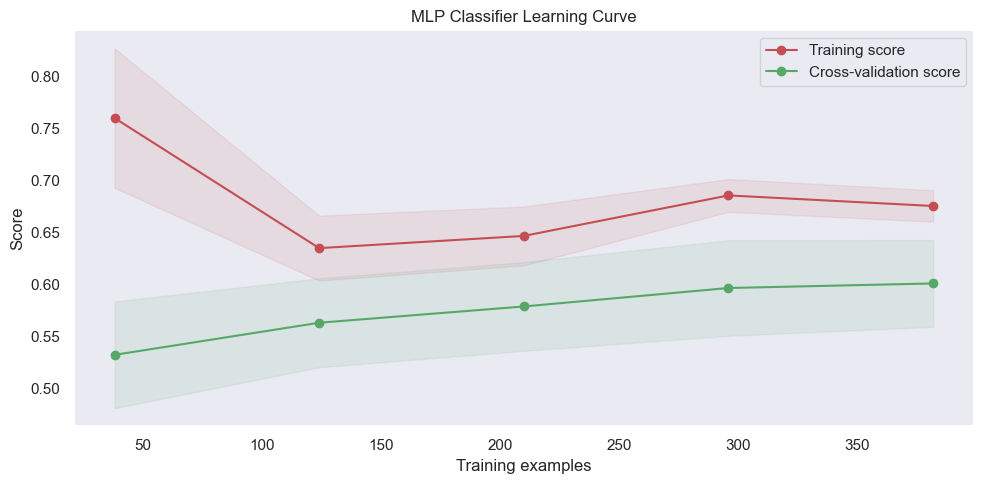

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('MLP Classifier Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score")
# Plot learning curve
ax.grid()
ax.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",)

ax.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",)
    
ax.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")   
ax.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")   
ax.legend(loc="best");

## Observations
  
The key observations are:  
   
1. The Preliminary MLP Classifier has:     
    a. Test Accuracy of 74.05%     
    b. Train Accuracy of 73.75%     
2. Optimization by varying number of Epochs (450) results in highest accuracy of 77.215%.
3. The Optimized MLP Classifier has:   
    a. Test Accuracy of 77.215%     
    b. Train Accuracy of 78.125%    
4. The 10 Fold Cross Validation fo the Base Decision Tree relusted in Mean Accuracy of 72.2%.

## Conclusion
Based on the obervations:

1. The Optimized MLP Classifier produced the maximum test accuracy of 77.215%.
2. The Cross Validation produced mean accuracy of 72.2% that show the model is quite well trained and have acceptable performance.